In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
charity_data = "cleaned_data.csv"
charity_df = pd.read_csv("cleaned_data.csv")
charity_df.dropna(subset=["Contributions", "Rating"], inplace=True)
charity_df.head()

,Unnamed: 0,Charity,ein,Mission,Cause,Category Name,Rating,State,Contributions
0,0,Mount Desert Island Biological Laboratory,10202467,The MDI Biological Laboratory is a rapidly gro...,"{'causeID': 35, 'causeName': 'Non-Medical Scie...",Research and Public Policy,92.61,ME,12924245.0
1,1,United Way of Eastern Maine,10211478,"Working with the communities we serve, the Uni...","{'causeID': 42, 'causeName': 'United Ways', 'c...",Community Development,81.84,ME,2438155.0
2,2,The Jackson Laboratory,10211513,"The Jackson Laboratory, founded in 1929, is an...","{'causeID': 14, 'causeName': 'Medical Research...",Health,93.16,ME,331241336.0
3,3,Maine Historical Society,10211530,"Founded in 1822, the Maine Historical Society ...","{'causeID': 6, 'causeName': 'Libraries, Histor...","Arts, Culture, Humanities",80.31,ME,2219692.0
4,4,Boys & Girls Clubs of Southern Maine,10211543,"For more than 100 years, Boys & Girls Clubs of...","{'causeID': 16, 'causeName': 'Youth Developmen...",Human Services,91.54,ME,3859985.0


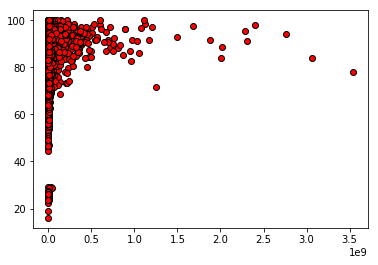

In [11]:
plt.scatter(charity_df["Contributions"], charity_df["Rating"], marker="o", color="red", edgecolors="black")

(0, 103)

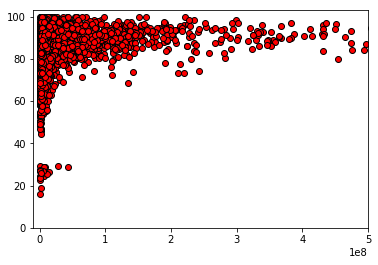

In [59]:
# There does seem to be a selection process though as a charity gets bigger. It doesn't neatly correlate to higher
# rating, but as we go higher, there tend to be fewer charities with lower rating
plt.scatter(charity_df["Contributions"], charity_df["Rating"], marker="o", color="red", edgecolors="black")
plt.xlim(-10000000, 500000000)
plt.ylim(0, 103)

(0, 102)

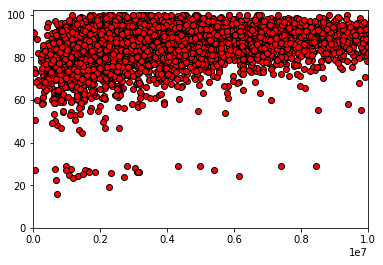

In [60]:
# There does seem to be a selection process though as a charity gets bigger. It doesn't neatly correlate to higher
# rating, but as we go higher, there tend to be fewer charities with lower rating
plt.scatter(charity_df["Contributions"], charity_df["Rating"], marker="o", color="red", edgecolors="black")
plt.xlim(-10, 10000000)
plt.ylim(0, 102)

In [71]:
bins = [np.percentile(charity_df["Contributions"], percentile) for percentile in np.arange(5, 100, 5)]
bins.insert(0, 0)
bins

[0,
 1083459.5,
 1414168.0,
 1710865.25,
 1973522.0,
 2255712.25,
 2601237.5,
 3027137.0,
 3484832.0,
 4037044.5,
 4685594.5,
 5484730.25,
 6405050.0,
 7655866.5,
 9613377.0,
 12172322.0,
 15845209.0,
 21870919.5,
 36438601.5,
 76718577.75]

In [76]:
# Establish bounds to cut the dataframe into 20 bins of equal size
bounds = [(value, bins[index+1] if index+1 < len(bins) else charity_df["Contributions"].max()) for (index, value) in enumerate(bins)]
charity_percentile_cuts = [charity_df[(charity_df["Contributions"] >= low_bound) & (charity_df["Contributions"] < upper_bound)] for (low_bound, upper_bound) in bounds]
len(charity_percentile_cuts)


20

In [79]:

ttest_results = [stats.ttest_ind(charity_cut["Rating"], charity_percentile_cuts[index+1]["Rating"], equal_var=False) for (index, charity_cut) in enumerate(charity_percentile_cuts) if index+1 < len(charity_percentile_cuts)]
ttest_results


[Ttest_indResult(statistic=-4.0528919217030435, pvalue=5.5317645277344245e-05),
 Ttest_indResult(statistic=-2.952342225335982, pvalue=0.0032399106903065744),
 Ttest_indResult(statistic=-1.6320887010198504, pvalue=0.10304584346062699),
 Ttest_indResult(statistic=-0.5389822749423353, pvalue=0.5900394486614547),
 Ttest_indResult(statistic=-0.6082765446823749, pvalue=0.5431674755742726),
 Ttest_indResult(statistic=-1.559819968548144, pvalue=0.1191773389638925),
 Ttest_indResult(statistic=-0.0437479792466493, pvalue=0.9651158076426699),
 Ttest_indResult(statistic=-1.0170863821239866, pvalue=0.30941533126355253),
 Ttest_indResult(statistic=-0.4142058634147919, pvalue=0.6788272757067273),
 Ttest_indResult(statistic=-0.8747985779827978, pvalue=0.3819298369488884),
 Ttest_indResult(statistic=-0.7227903459683226, pvalue=0.4700068957984619),
 Ttest_indResult(statistic=-1.311061836551533, pvalue=0.1901894671655777),
 Ttest_indResult(statistic=0.43043703269944394, pvalue=0.6669861711687199),
 Ttest

In [80]:
significant_results = [(index, result) for (index, result) in enumerate(ttest_results) if result.pvalue < 0.05]
significant_results

[(0,
  Ttest_indResult(statistic=-4.0528919217030435, pvalue=5.5317645277344245e-05)),
 (1,
  Ttest_indResult(statistic=-2.952342225335982, pvalue=0.0032399106903065744)),
 (15,
  Ttest_indResult(statistic=-2.1622647758422597, pvalue=0.030889572598766485))]

In [91]:
stats.f_oneway(*[charity_data["Rating"] for charity_data in charity_percentile_cuts])

F_onewayResult(statistic=59.16261358005949, pvalue=3.2764144841216294e-212)

In [94]:
n_minus_one_data = [[charity_data["Rating"] for (index, charity_data) in enumerate(charity_percentile_cuts) if index != excluded_idx] for excluded_idx in range(0, 20)]
n_minus_one_data[0]


[5       84.80
 84      84.04
 88      77.16
 105     83.34
 124     56.93
 175     89.91
 217     81.47
 234     93.35
 242     88.74
 271     81.54
 272     97.15
 298     89.49
 306     90.36
 330     82.32
 347     90.51
 357     74.48
 474     80.77
 482     90.05
 505     80.07
 513     87.97
 518     78.55
 558     88.58
 577     76.18
 587     81.29
 596     89.75
 633     91.29
 636     85.86
 679     74.82
 813     72.12
 837     71.91
         ...  
 7668    67.47
 7674    78.88
 7676    65.85
 7687    85.70
 7715    77.01
 7740    77.32
 7747    75.61
 7759    82.04
 7765    77.16
 7767    85.67
 7803    91.94
 7836    88.57
 7861    67.12
 7876    82.01
 7956    56.01
 7998    27.59
 8037    85.04
 8046    74.64
 8047    82.11
 8065    76.06
 8121    81.58
 8164    84.42
 8319    82.36
 8331    73.58
 8440    84.81
 8453    80.75
 8466    77.28
 8471    80.12
 8513    82.14
 8531    95.80
 Name: Rating, Length: 429, dtype: float64, 8       82.26
 16      89.28
 24      87.

In [95]:
anova_results = [stats.f_oneway(*charity_ratings) for charity_ratings in n_minus_one_data]
anova_results

[F_onewayResult(statistic=38.58842859504732, pvalue=5.25581875079921e-130),
 F_onewayResult(statistic=54.020447613732564, pvalue=1.16611136072803e-183),
 F_onewayResult(statistic=60.857853284006644, pvalue=5.2982792644507186e-207),
 F_onewayResult(statistic=61.04950413957683, pvalue=1.1806474144450001e-207),
 F_onewayResult(statistic=61.36819318914219, pvalue=9.833453275787058e-209),
 F_onewayResult(statistic=62.652592492026606, pvalue=4.383467557476508e-213),
 F_onewayResult(statistic=62.393048056744334, pvalue=3.3132142534541293e-212),
 F_onewayResult(statistic=63.772453306641424, pvalue=7.150840861156329e-217),
 F_onewayResult(statistic=62.07560925879487, pvalue=3.936925994924272e-211),
 F_onewayResult(statistic=61.8118797106518, pvalue=3.080634918253539e-210),
 F_onewayResult(statistic=61.95205339489068, pvalue=1.0320456670630126e-210),
 F_onewayResult(statistic=61.349612689763504, pvalue=1.1326050712529067e-208),
 F_onewayResult(statistic=60.388081662071336, pvalue=2.0857548700446

In [126]:
indexed_results = [(index, result) for (index, result) in enumerate(anova_results)]
sorted_results = sorted(indexed_results, key=lambda result: result[1].pvalue, reverse=True)
sorted_results

[(0,
  F_onewayResult(statistic=38.58842859504732, pvalue=5.25581875079921e-130)),
 (1,
  F_onewayResult(statistic=54.020447613732564, pvalue=1.16611136072803e-183)),
 (19,
  F_onewayResult(statistic=55.083228085357774, pvalue=2.626737501378764e-187)),
 (18,
  F_onewayResult(statistic=57.19314952775525, pvalue=1.5911080052505927e-194)),
 (16,
  F_onewayResult(statistic=57.78511070262187, pvalue=1.5168052919594806e-196)),
 (17,
  F_onewayResult(statistic=57.90627255067962, pvalue=5.85559407361719e-197)),
 (12,
  F_onewayResult(statistic=60.388081662071336, pvalue=2.085754870044683e-205)),
 (15,
  F_onewayResult(statistic=60.42632333941238, pvalue=1.5408877953707874e-205)),
 (13,
  F_onewayResult(statistic=60.55292847400253, pvalue=5.746104489733048e-206)),
 (14,
  F_onewayResult(statistic=60.788931557662046, pvalue=9.079903064689719e-207)),
 (2,
  F_onewayResult(statistic=60.857853284006644, pvalue=5.2982792644507186e-207)),
 (3,
  F_onewayResult(statistic=61.04950413957683, pvalue=1.18

In [122]:
largest_diff = max([anova_result.pvalue for anova_result in anova_results])
most_different_result = [(index, result) for (index, result) in indexed_results if result.pvalue == largest_diff]
most_different_result


[(0,
  F_onewayResult(statistic=38.58842859504732, pvalue=5.25581875079921e-130))]

In [102]:
# Charity amount 
print(f"Percentage of passing scores below {'${:,.2f}'.format(bins[1])}: {len(charity_percentile_cuts[0][charity_percentile_cuts[0]['Rating'] > 70]) / len(charity_percentile_cuts[0])}")
print(f"Percentage of passing scores generally: {len(charity_df[charity_df['Rating'] > 70]) / len(charity_df)}")


Percentage of passing scores below $1,083,459.50: 0.8298368298368298
Percentage of passing scores generally: 0.964902052238806


In [120]:
# Charity amount 
print(f"Average rating below {'${:,.2f}'.format(bins[1])}: {np.mean(charity_percentile_cuts[0]['Rating'])}")
print(f"Average rating generally: {np.mean(charity_df['Rating'])}")


Average rating below $1,083,459.50: 78.50869463869468
Average rating generally: 86.57291744402984


/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


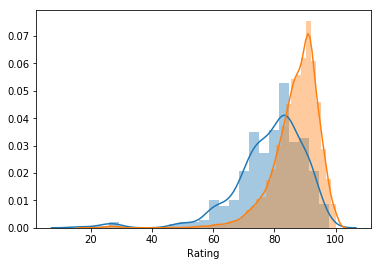

In [109]:
sns.distplot(charity_percentile_cuts[0]["Rating"])
sns.distplot(charity_df[charity_df["Contributions"] > 1083459.5]["Rating"])

In [116]:
stats.ttest_ind(charity_percentile_cuts[0]["Rating"], charity_df[charity_df["Contributions"] > bins[1]]["Rating"])

Ttest_indResult(statistic=-21.060176204899808, pvalue=4.844901330816472e-96)

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


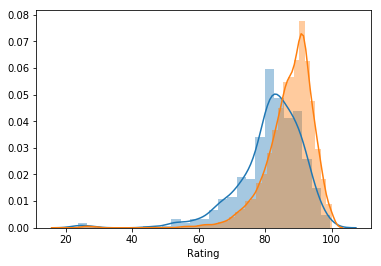

In [111]:
sns.distplot(charity_percentile_cuts[1]["Rating"])
sns.distplot(charity_df[charity_df["Contributions"] > bins[2]]["Rating"])

In [142]:
stats.ttest_ind(charity_df[charity_df["Contributions"] < bins[6]]["Rating"], charity_df[charity_df["Contributions"] >= bins[6]]["Rating"])


Ttest_indResult(statistic=-26.538038735300596, pvalue=3.3235804963485986e-149)

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


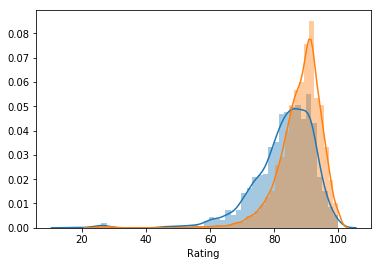

In [143]:
sns.distplot(charity_df[charity_df["Contributions"] < bins[6]]["Rating"])
sns.distplot(charity_df[charity_df["Contributions"] >= bins[6]]["Rating"])

In [137]:
ttest_results = [stats.ttest_ind(charity_df[charity_df["Contributions"] < edge]["Rating"], charity_df[charity_df["Contributions"] >= edge]["Rating"]) for edge in bins[1:]]
ttest_results

[Ttest_indResult(statistic=-21.060176204899808, pvalue=4.844901330816472e-96),
 Ttest_indResult(statistic=-25.080550378985485, pvalue=5.041267069019652e-134),
 Ttest_indResult(statistic=-25.95380027589697, pvalue=4.950558039414248e-143),
 Ttest_indResult(statistic=-26.019333838617776, pvalue=1.0186876641350768e-143),
 Ttest_indResult(statistic=-26.29285379408127, pvalue=1.3378766107444666e-146),
 Ttest_indResult(statistic=-26.538038735300596, pvalue=3.3235804963485986e-149),
 Ttest_indResult(statistic=-25.98408308956188, pvalue=2.385371110968004e-143),
 Ttest_indResult(statistic=-25.765855155495082, pvalue=4.52504506712516e-141),
 Ttest_indResult(statistic=-25.124360606882366, pvalue=1.806847490818504e-134),
 Ttest_indResult(statistic=-24.520032569259172, pvalue=2.211401108419526e-128),
 Ttest_indResult(statistic=-23.642307337199025, pvalue=9.063178678167066e-120),
 Ttest_indResult(statistic=-22.564148632993568, pvalue=1.4448737174805125e-109),
 Ttest_indResult(statistic=-20.9182118643

In [140]:
idx_ttest_results = enumerate(ttest_results)
best_slice = sorted(idx_ttest_results, key=lambda result: result[1].pvalue)[0]
print(best_slice)
bins[best_slice[0] + 1]

(5, Ttest_indResult(statistic=-26.538038735300596, pvalue=3.3235804963485986e-149))


2601237.5

In [141]:
# Charity amount 
edge = best_slice[0] + 1
print(f"Average rating below {'${:,.2f}'.format(bins[edge])}: {np.mean(charity_df[charity_df['Contributions'] < bins[edge]]['Rating'])}")
print(f"Average rating above: {np.mean(charity_df[charity_df['Contributions'] >= bins[edge]]['Rating'])}")


Average rating below $2,601,237.50: 83.0615701515742
Average rating above: 88.07794769281989


/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


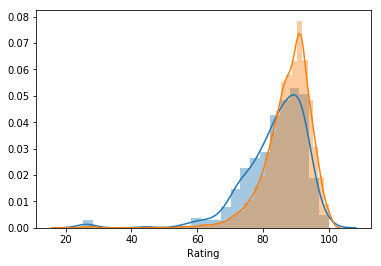

In [112]:
sns.distplot(charity_percentile_cuts[2]["Rating"])
sns.distplot(charity_df[charity_df["Contributions"] > bins[3]]["Rating"])

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


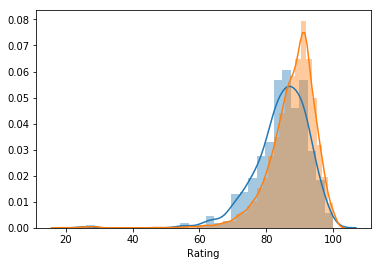

In [113]:
sns.distplot(charity_percentile_cuts[3]["Rating"])
sns.distplot(charity_df[charity_df["Contributions"] > bins[4]]["Rating"])

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


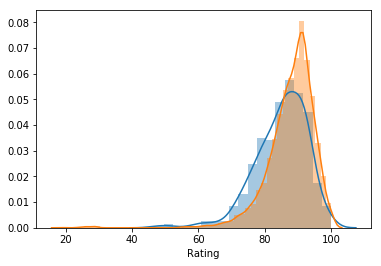

In [114]:
sns.distplot(charity_percentile_cuts[4]["Rating"])
sns.distplot(charity_df[charity_df["Contributions"] > bins[5]]["Rating"])

In [18]:
# Charities of shame
charity_df[charity_df["Rating"] < 40]

,Unnamed: 0,Charity,ein,Mission,Cause,Category Name,Rating,State,Contributions
737,740,American Jewish Congress,131679610,The American Jewish Congress (AJ Congress) is ...,"{'causeID': 19, 'causeName': 'International Pe...",International,22.45,NY,689017.0
789,792,National Cancer Center,131919715,"Founded in 1953, the focus of National Cancer ...","{'causeID': 14, 'causeName': 'Medical Research...",Health,26.37,NY,3162023.0
939,944,HonorBound Foundation,133102064,To support and provide education to veterans a...,"{'causeID': 29, 'causeName': 'Social Services'...",Human Services,28.86,CT,8461191.0
943,948,The New Criterion,133108424,"The New Criterion, a monthly review of the art...","{'causeID': 5, 'causeName': 'Public Broadcasti...","Arts, Culture, Humanities",28.02,NY,3036845.0
1065,1070,The Creative Coalition,133517803,The Creative Coalition was formed for the char...,"{'causeID': 21, 'causeName': 'Advocacy and Edu...",Human and Civil Rights,26.75,NY,1650674.0
1107,1112,Veterans Support Foundation,133648561,"Established in 1991, the Veterans Support Foun...","{'causeID': 29, 'causeName': 'Social Services'...",Human Services,28.86,MD,4978919.0
1678,1686,Autism Spectrum Disorder Foundation,208820570,"Founded in 2007, ASDF helps meet the needs of ...","{'causeID': 13, 'causeName': 'Diseases, Disord...",Health,23.84,IN,2711131.0
1908,1916,Karen Ann Quinlan Charitable Foundation,223562304,To ensure the sustainability of Karen Ann Quin...,"{'causeID': 34, 'causeName': 'Patient and Fami...",Health,28.86,NJ,4323217.0
2211,2219,Dakota Indian Foundation,237112391,Dakota Indian Foundation was founded in 1971 b...,"{'causeID': 29, 'causeName': 'Social Services'...",Human Services,27.44,SD,668492.0
2574,2583,Disabled Veterans National Foundation,261446183,"Founded in 2007, the Disabled Veterans Nationa...","{'causeID': 29, 'causeName': 'Social Services'...",Human Services,29.25,MD,28404117.0
